### Correlations for CO2/GDP/Pop

Analysis of correlations between the 3 initial variables CO2, GDP and Population.
Also running some inital ML Models on the data.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import scipy.stats as sci

Read in data file

In [123]:
df=pd.read_csv('data/CO2_pivot_noCO2_930.csv')

# Remove all 2020 rows
df=df.drop(df[df['Year'] == 2020].index)

Remove all non-country entries, and add them to a new dataframe

In [124]:
non_country=['Africa Eastern and Southern','Africa Western and Central','Arab World','Caribbean small states','Central Europe and the Baltics','Early-demographic dividend','East Asia & Pacific','East Asia & Pacific (IDA & IBRD countries)','East Asia & Pacific (excluding high income)','Euro area','Europe & Central Asia','Europe & Central Asia (IDA & IBRD countries)','Europe & Central Asia (excluding high income)','European Union','Fragile and conflict affected situations','Heavily indebted poor countries (HIPC)','High income','IBRD only','IDA & IBRD total','IDA blend','IDA only','IDA total','Late-demographic dividend','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Latin America & the Caribbean (IDA & IBRD countries)','Least developed countries: UN classification','Low & middle income','Low income','Lower middle income','Middle East & North Africa','Middle East & North Africa (IDA & IBRD countries)','Middle East & North Africa (excluding high income)','Middle income','North America','OECD members','Other small states','Pacific island small states','Post-demographic dividend','Pre-demographic dividend','Small states','South Asia','South Asia (IDA & IBRD)','Sub-Saharan Africa','Sub-Saharan Africa (IDA & IBRD countries)','Sub-Saharan Africa (excluding high income)','Upper middle income','World',]
for count in non_country:
    df=df.drop(df[df['Country Name'] == count].index)

print(df.shape)

df.to_csv('Data/CO2_pivot_noCO2_Countries_930.csv')

(3056, 931)


Create list of countries below and above 1million. To be used for filtering plotting and other methods.

In [125]:
con_under1m=df[(df["Population, total"] < 1000000) & (df["Year"]==2019)]
con_under1m=con_under1m['Country Name'].unique()

con_over1m=df[(df["Population, total"] > 1000000) & (df["Year"]==2019)]
con_over1m=con_over1m['Country Name'].unique()

Create columns for CO2 per Capita and GDP per capita

In [126]:
df['CO2 per capita']=df['CO2 emissions (kt)']/df['Population, total']
df['GDP per capita']=df['GDP (current US$)']/df['Population, total']

Create list of catagories

In [127]:
print(df.shape)

cats=pd.DataFrame(df.columns.values)
cats.drop(1)

cats.to_csv('plots/Series_names.csv')
# type(cats)
print(cats)

(3056, 933)
                                                     0
0                                           Unnamed: 0
1                                         Country Name
2                                                 Year
3    ARI treatment (% of children under 5 taken to ...
4    Access to clean fuels and technologies for coo...
..                                                 ...
928  Women who were first married by age 18 (% of w...
929  Women's share of population ages 15+ living wi...
930  Young people (ages 15-24) newly infected with HIV
931                                     CO2 per capita
932                                     GDP per capita

[933 rows x 1 columns]


Remove un-wanted index column

In [128]:
df=df.drop(['Unnamed: 0'],axis=1)

Testing looking up one country and one year

In [129]:
afganisatan=df[(df['Country Name']=='Afghanistan')&(df['Year']==2008)]

In [130]:
df['Country Name'].unique().shape

(191,)

Create a list of countries, which in 2019, have GDP per Capita over $10k. Only 67  out of 191 countries are above $10k.

In [131]:
con_over10k=df[(df["GDP per capita"] > 10000) & (df["Year"]==2019)]
con_over10k.shape


(67, 932)

Creating correlations for all CO2-GDP, CO2-Pop, GDP-Pop, CO2 capita-GDP capita,CO2 capita - Pop, GDP capita - Pop, for each country. 

Then adding all the outcomes to a new dataframe, corrlist.

In [132]:
countries=df['Country Name'].unique()
corrlist=pd.DataFrame(df['Country Name'].unique())
corrlist.columns=['Country Name']
co2_gdp_cor=[]
co2_pop_cor=[]
gdp_pop_cor=[]
co2_gdp_capita_cor=[]
co2_pop_capita_cor=[]
gdp_pop_capita_cor=[]


for count in countries:
    cor=df[(df['Country Name']==count)]['CO2 emissions (kt)'].corr(df[(df['Country Name']==count)]['GDP (current US$)'])
    co2_gdp_cor.append(cor)
    cor=df[(df['Country Name']==count)]['CO2 emissions (kt)'].corr(df[(df['Country Name']==count)]['Population, total'])
    co2_pop_cor.append(cor)
    cor=df[(df['Country Name']==count)]['GDP (current US$)'].corr(df[(df['Country Name']==count)]['Population, total'])
    gdp_pop_cor.append(cor)
    cor=df[(df['Country Name']==count)]['CO2 per capita'].corr(df[(df['Country Name']==count)]['GDP per capita'])
    co2_gdp_capita_cor.append(cor)
    cor=df[(df['Country Name']==count)]['CO2 per capita'].corr(df[(df['Country Name']==count)]['Population, total'])
    co2_pop_capita_cor.append(cor)
    cor=df[(df['Country Name']==count)]['GDP per capita'].corr(df[(df['Country Name']==count)]['Population, total'])
    gdp_pop_capita_cor.append(cor)

corrlist['CO2/GDP']=co2_gdp_cor

corrlist['CO2/Pop']=co2_pop_cor

corrlist['GDP/Pop']=gdp_pop_cor

corrlist['CO2 capita/GDP capita']=co2_gdp_capita_cor

corrlist['CO2 capita/Pop']=co2_pop_capita_cor

corrlist['GDP capita/Pop']=gdp_pop_capita_cor


corrlist

,Country Name,CO2/GDP,CO2/Pop,GDP/Pop,CO2 capita/GDP capita,CO2 capita/Pop,GDP capita/Pop
0,Afghanistan,0.953843,0.845380,0.843792,0.931860,0.695727,0.644348
1,Albania,0.728934,-0.799527,-0.892734,0.789627,-0.851255,-0.907889
2,Algeria,0.694246,0.990865,0.658552,0.523238,0.965950,0.403453
3,Andorra,0.394701,0.766787,0.209314,0.341128,0.259760,-0.169216
4,Angola,0.578267,0.763355,0.350326,0.496977,0.023049,0.040203
...,...,...,...,...,...,...,...
186,"Venezuela, RB",0.846195,0.274444,0.946450,0.650696,-0.124547,0.930116
187,Viet Nam,0.950888,0.947778,0.995398,0.940201,0.946655,0.994372
188,"Yemen, Rep.",0.144301,-0.633956,0.580068,0.153092,-0.824813,0.319294
189,Zambia,0.687603,0.954729,0.814469,0.370114,0.935116,0.560745


Create histograms of the correlations.

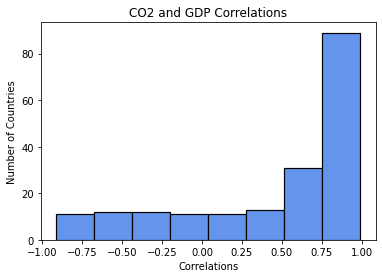

In [133]:
pl.hist(corrlist['CO2/GDP'],bins=8,color='cornflowerblue',edgecolor='black', linewidth=1.2)
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.title('CO2 and GDP Correlations',loc='center')
pl.savefig('Plots/CO2_GDP Correlations.pdf')

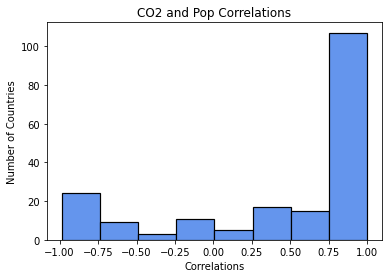

In [134]:
pl.hist(corrlist['CO2/Pop'],bins=8,color='cornflowerblue',edgecolor='black', linewidth=1.2)
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.title('CO2 and Pop Correlations',loc='center')
pl.savefig('Plots/CO2_Pop Correlations.pdf')

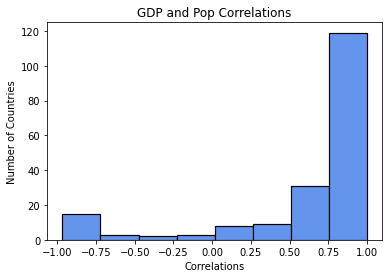

In [135]:
pl.hist(corrlist['GDP/Pop'],bins=8,color='cornflowerblue',edgecolor='black', linewidth=1.2)
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.title('GDP and Pop Correlations',loc='center')
pl.savefig('Plots/GDP_Pop Correlations.pdf')

Create a histogram combing all 3 correlations

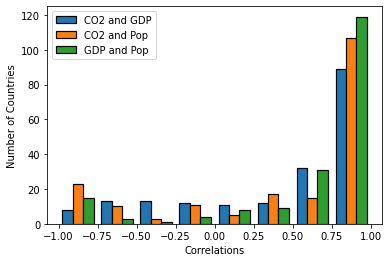

In [136]:
pl.hist(corrlist[['CO2/GDP','CO2/Pop','GDP/Pop']],bins=8,range=(-1,1),histtype='bar',edgecolor='black', linewidth=1.2,label=['CO2 and GDP','CO2 and Pop','GDP and Pop'])
pl.legend()
pl.xlabel('Correlations')
pl.ylabel('Number of Countries')
pl.savefig('Plots/Combined Correlations.pdf')

Create a scatter plot for CO2 - GDP for each country

In [137]:
%%capture
for count in countries:
    GDP=df[(df['Country Name']==count)]['GDP (current US$)']
    CO2=df[(df['Country Name']==count)]['CO2 emissions (kt)']
    corr=corrlist[corrlist['Country Name']==count]['CO2/GDP']
    pl.scatter(GDP,CO2,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 emissions (kt)')
    pl.xlabel('GDP (current US$)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(GDP.iloc[i],CO2.iloc[i],txt)

    pl.savefig('Plots/CO2_GDP Plots/'+ count +' CO2_GDP.pdf')
    pl.clf()

Create a scatter plot for CO2 per capita - GDP per capita for each country

In [138]:
%%capture
for count in countries:
    GDP=df[(df['Country Name']==count)]['GDP per capita']
    CO2=df[(df['Country Name']==count)]['CO2 per capita']
    corr=corrlist[corrlist['Country Name']==count]['CO2 capita/GDP capita']
    pl.scatter(GDP,CO2*1000,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 per capita (t)')
    pl.xlabel('GDP per capita (US$)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(GDP.iloc[i],CO2.iloc[i]*1000,txt)

    pl.savefig('Plots/CO2_GDP_capita Plots/'+ count +' CO2_GDP_capita.pdf')
    pl.clf()

Create World Dataframe to include world values from original data.

Then calculate CO2 and GDP per capita for world data.

In [139]:
# Load original data again
df_all=pd.read_csv('data/CO2_pivot_noCO2_930.csv')
# Remove all 2020 rows
df_all=df_all.drop(df_all[df_all['Year'] == 2020].index)

# Create world df with year as first column
all_years=df_all['Year'].unique()
world=pd.DataFrame(all_years)
world.columns=['Year']

# Move all data from df_all to new world df
world_co2=df_all[(df_all['Country Name']=='World')]['CO2 emissions (kt)']
world_gdp=df_all[(df_all['Country Name']=='World')]['GDP (current US$)']
world_pop=df_all[(df_all['Country Name']=='World')]['Population, total']
world['CO2 emissions (kt)']= world_co2.values
world['GDP (current US$)']= world_gdp.values
world['Population, total']= world_pop.values

# Calculate per capita values for world
world['CO2 per capita']=world['CO2 emissions (kt)']/world['Population, total']
world['GDP per capita']=world['GDP (current US$)']/world['Population, total']
world['Population, average']=world['Population, total']/191

world


,Year,CO2 emissions (kt),GDP (current US$),"Population, total",CO2 per capita,GDP per capita,"Population, average"
0,2004,27331852.94,4.411624e+13,6471033757,0.004224,6817.495663,3.387976e+07
1,2005,28371817.05,4.776032e+13,6552787172,0.004330,7288.550579,3.430779e+07
2,2006,29308175.54,5.174981e+13,6635162568,0.004417,7799.327914,3.473907e+07
3,2007,30418994.07,5.831487e+13,6717583637,0.004528,8680.929197,3.517059e+07
4,2008,30632298.65,6.407230e+13,6801421733,0.004504,9420.426853,3.560954e+07
5,2009,30238050.03,6.071826e+13,6885608628,0.004391,8818.140274,3.605031e+07
6,2010,32095872.94,6.651417e+13,6969894715,0.004605,9543.067342,3.649160e+07
7,2011,33079721.35,7.395779e+13,7053988749,0.004690,10484.535139,3.693188e+07
8,2012,33460087.50,7.560398e+13,7141430933,0.004685,10586.670574,3.738969e+07
9,2013,34119894.39,7.775137e+13,7229458453,0.004720,10754.798415,3.785057e+07


Calculate per capita values normalised against world per capita values in 2019, for CO2 and GDP.
For Population normalise against the average countries population in 2019


This makes the per capita values easier to compare when looking at different countries 

In [140]:
df['CO2 per capita NORM']=df['CO2 per capita'].values/world[(world['Year']==2019)]['CO2 per capita'].values
df['GDP per capita NORM']=df['GDP per capita'].values/world[(world['Year']==2019)]['GDP per capita'].values
df['Population NORM']=df['Population, total'].values/world[(world['Year']==2019)]['Population, average'].values
df['CO2 per capita']
# Test country
df[(df['Country Name']=='Spain')]['Population NORM']
print(world[(world['Year']==2019)]['CO2 per capita'].values)


[0.00458201]


#### Create a scatter plot for CO2 per capita Normalised against World - GDP per capita Normalised against World for each country

These plots show CO2 per capita normalised against World CO2 per capita (2019) for each country,
(which is World CO2 divided by Population in 2019, or average CO2 per person.) plotted against GDP
per capita normalised against World GDP per capita (2019). Both these results will show as 1 when
matching the World per capita (2019). Years are shown for each scatter point, to aid analysis.
Generally countries with both lower CO2 and GDP per capita have stronger positive correlation,
with some of the strongest correlations, around 0.95, being held by countries with particularly low
numbers in each.
Conversely, generally countries with high CO2 and GDP per capita have a negative correlation.
But the difference with these countries is they are generally less correlated, normally around -0.6, than
the countries with lower CO2 and GDP. In these countries the CO2 does reduce over time, but the
GDP does not always increase with it, sometimes it also decreases or stays the same. It appears that at
some point of developing and reaching higher CO2/GDP levels, the CO2 and GDP of some countries
become unlinked, with CO2 reducing but with no solid connection to GDP.

In [141]:
%%capture
for count in countries:
    GDP=df[(df['Country Name']==count)]['GDP per capita NORM']
    CO2=df[(df['Country Name']==count)]['CO2 per capita NORM']
    corr=corrlist[corrlist['Country Name']==count]['CO2 capita/GDP capita']
    pl.scatter(GDP,CO2,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 per capita/World CO2 per capita (2019)')
    pl.xlabel('GDP per capita/World GDP per capita (2019)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(GDP.iloc[i],CO2.iloc[i],txt)
    pl.savefig('Plots/CO2_GDP_capita_NORM Plots/'+ count +' CO2_GDP_capita_NORM.pdf')
    pl.clf()

#### Create a scatter plot for CO2 per capita Normalised against World - Population Normalised against average country size

The plots show CO2 per capita normalised against World CO2 per capita (2019) for each country,
(which is World CO2 divided by Population in 2019, or average CO2 per person.) plotted against
Population normalised against World average population (2019). Years are shown for each scatter
point, to aid analysis.
The pattern of countries with a strong positive correlation is not so clear, as with CO2 /GDP.
Some countries with high correlation have high population and some have low. But it does seem that
generally they are countries with low GDP per capita, and from the developing world.
Countries with a strong negative correlation, regardless of population size, have high CO2 per
capita which reduces as population increases. These countries which reduce CO2, as shown in the
previous CO2 /GDP plots, generally have higher GDP per capita. This reduction in CO2 per capita
as population increase could be due to efficiencies as population increases, which are only able to
be utilised by wealthy countries. But it could also be due to other changes within these countries,
unconnected to the population, which have taken place and affected CO2 in spite of population change,
e.g. technological advances, change in trade levels.


In [142]:
%%capture
for count in countries:
    POP=df[(df['Country Name']==count)]['Population NORM']
    CO2=df[(df['Country Name']==count)]['CO2 per capita NORM']
    corr=corrlist[corrlist['Country Name']==count]['CO2 capita/Pop']
    pl.scatter(POP,CO2,label='r='+str(np.round(corr.iloc[0],2)))
    pl.legend()
    pl.title(count)
    pl.ylabel('CO2 per capita/World CO2 per capita (2019)')
    pl.xlabel('Pop/Average Pop(2019)')
    years=df[(df['Country Name']==count)]['Year']
    for i,txt in enumerate(years):
        pl.text(POP.iloc[i],CO2.iloc[i],txt)
    pl.savefig('Plots/CO2_POP_capita_NORM Plots/'+ count +' CO2_POP_capita_NORM.pdf')
    pl.clf()

Add a Column to Corrlist for GDP per capita in 2019.

In [143]:
gdp_capita_2019=[]


for count in countries:
    cor=df[(df['Country Name']==count) & (df['Year']==2019)]['GDP per capita NORM']
    gdp_capita_2019.append(cor.values[0])

corrlist['GDP capita NORM 2019']=gdp_capita_2019

corrlist


,Country Name,CO2/GDP,CO2/Pop,GDP/Pop,CO2 capita/GDP capita,CO2 capita/Pop,GDP capita/Pop,GDP capita NORM 2019
0,Afghanistan,0.953843,0.845380,0.843792,0.931860,0.695727,0.644348,0.043821
1,Albania,0.728934,-0.799527,-0.892734,0.789627,-0.851255,-0.907889,0.475082
2,Algeria,0.694246,0.990865,0.658552,0.523238,0.965950,0.403453,0.398830
3,Andorra,0.394701,0.766787,0.209314,0.341128,0.259760,-0.169216,3.638568
4,Angola,0.578267,0.763355,0.350326,0.496977,0.023049,0.040203,0.192926
...,...,...,...,...,...,...,...,...
186,"Venezuela, RB",0.846195,0.274444,0.946450,0.650696,-0.124547,0.930116,NaN
187,Viet Nam,0.950888,0.947778,0.995398,0.940201,0.946655,0.994372,0.307356
188,"Yemen, Rep.",0.144301,-0.633956,0.580068,0.153092,-0.824813,0.319294,NaN
189,Zambia,0.687603,0.954729,0.814469,0.370114,0.935116,0.560745,0.111645


Plot Showing when CO2 and GDP become unlinked - Plot CO2/GDP_Corr against GDP_Capita_Norm

/var/folders/8j/2xw6vvr51bsczxp4p37711lx24bqhv/T/ipykernel_84463/3601664857.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pl.legend()


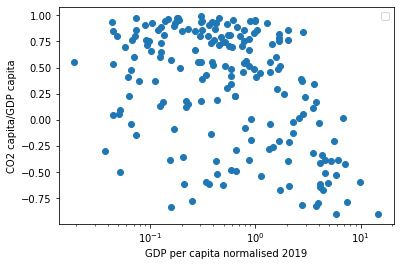

In [144]:
pl.xscale('log')
pl.scatter(corrlist['GDP capita NORM 2019'],corrlist['CO2 capita/GDP capita'])
pl.legend()

# pl.title()
pl.ylabel('CO2 capita/GDP capita')
pl.xlabel('GDP per capita normalised 2019')
pl.savefig('Plots/CO2_GDP_Corr_GDP_capita_Norm_2019.pdf')

Plot Showing when CO2 and GDP become unlinked - Plot CO2/GDP_Corr against GDP_Capita_Norm - for countries over 1 million population

Bin data, to then allow bin centre points to be used for ploting the best fit line.

In [145]:
nbins = 10
bin_means,bin_edges,binnumber=sci.binned_statistic(np.log10(corrlist[(corrlist['Country Name'].isin(con_over1m)) & (corrlist["GDP capita NORM 2019"].notna())]['GDP capita NORM 2019']), corrlist[(corrlist['Country Name'].isin(con_over1m)) & (corrlist["GDP capita NORM 2019"].notna())]['CO2 capita/GDP capita'],statistic='mean',bins=nbins)
bin_std,bin_std_edges,bin_std_number=sci.binned_statistic(np.log10(corrlist[(corrlist['Country Name'].isin(con_over1m)) & (corrlist["GDP capita NORM 2019"].notna())]['GDP capita NORM 2019']), corrlist[(corrlist['Country Name'].isin(con_over1m)) & (corrlist["GDP capita NORM 2019"].notna())]['CO2 capita/GDP capita'],statistic='std',bins=nbins)
bin_centre =  10**((bin_edges[:-1] + bin_edges[1:]) / 2)
unique, counts_in_bin = np.unique(binnumber, return_counts=True)

/var/folders/8j/2xw6vvr51bsczxp4p37711lx24bqhv/T/ipykernel_84463/3043220629.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pl.legend()


Text(0.5, 0, 'GDP per capita normalised 2019')

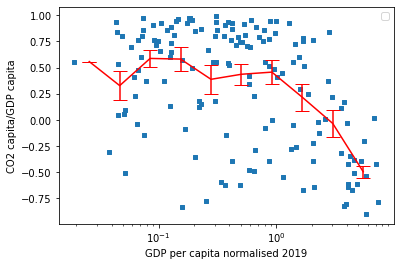

In [146]:
corrlist[corrlist['Country Name'].isin(con_over1m)]

pl.xscale('log')
pl.scatter(corrlist[corrlist['Country Name'].isin(con_over1m)]['GDP capita NORM 2019'],corrlist[corrlist['Country Name'].isin(con_over1m)]['CO2 capita/GDP capita'],marker='s',s=10)
# pl.plot(bin_centre,bin_means,c='r',linewidth=1.5)
pl.errorbar(bin_centre,bin_means,yerr=bin_std/np.sqrt(counts_in_bin),c='r',capsize=7)

pl.legend()

# pl.title()
pl.ylabel('CO2 capita/GDP capita')
pl.xlabel('GDP per capita normalised 2019')


# pl.savefig('Plots/CO2_GDP_Corr_GDP_capita_Norm_2019_over1m.pdf')

### Correlation Matrix
```
DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)
```

In [147]:
import seaborn as sb

Create correlation matrix, of CO2 Emissions against all other parameters.

In [148]:
df_min=df.drop(['Country Name','Year'],axis=1)

In [149]:
corr_matrix_abs=df_min.corr()['CO2 emissions (kt)'].abs()
corr_matrix_abs.sort_values(ascending=False, inplace=True)

corr_matrix_abs.head(50)

corr_matrix=df_min.corr()['CO2 emissions (kt)']
corr_matrix=corr_matrix.sort_values(ascending=False)

# corr_matrix.tail(50)


In [150]:
corr_matrix['Central government debt, total (current LCU)']

0.09352339244975502

Finds all parameters with correlation over 0.95. This is not useful as it will just remove all of them, so for each pair correlating it will remove both.

In [119]:
# Select upper triangle of correlation matrix
# upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.95
# to_drop=[column for column in upper.columns if any(upper[column] > 0.95)]

# to_drop.__len__()
# to_drop.remove('CO2 emissions (kt)')

# to_drop

# df_rem_corr=df.drop(to_drop, axis=1)


In [115]:
# sb.heatmap(corr_matrix.loc[:,['CO2 emissions (kt)']], cmap="Reds", annot=True)

## ML Methods

Make reduced dataframe.
Remove rows with NAN values.

Create reduced df with 4 parameters. Then remove nan's

In [151]:
df_reduced=df[['Country Name','Year','CO2 emissions (kt)','GDP (current US$)','Population, total']]
df_reduced=df_reduced.dropna()
df_reduced.isnull().sum()


Country Name          0
Year                  0
CO2 emissions (kt)    0
GDP (current US$)     0
Population, total     0
dtype: int64

Remove paramters with nans from full df.

In [152]:
df.dropna(axis=1,inplace=True)


Define X and y

In [153]:
# X=df_reduced[['Year','GDP (current US$)','Population, total']]
# y=df_reduced['CO2 emissions (kt)']

X=df.drop(['Country Name','CO2 emissions (kt)',],axis=1)
        #    'Total greenhouse gas emissions (kt of CO2 equivalent)',
        #    'Adjusted savings: carbon dioxide damage (current US$)',
        #    'Cereal production (metric tons)',
        #    'Gross capital formation (constant 2015 US$)',
        #    'Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)
        
y=df['CO2 emissions (kt)']

In [154]:
X

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),CO2 emissions (metric tons per capita),Capture fisheries production (metric tons),Methane emissions (kt of CO2 equivalent),...,Statistical performance indicators (SPI): Pillar 1 data use score (scale 0-100),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Urban population growth (annual %),CO2 per capita,CO2 per capita NORM,Population NORM
0,2004,138.827,109.286820,4.806580,104.480240,8342.6550,3427.2086,0.054867,1000.00,10500.31890,...,20.0,57.009717,50.875379,15572.01238,5299549,22.500,4.588653,0.000055,0.011974,0.581026
1,2005,133.071,107.964605,4.781964,103.182640,8496.7050,3575.3444,0.080361,1000.00,10731.72838,...,20.0,57.754769,51.383972,16635.76076,5542073,22.703,4.474690,0.000080,0.017538,0.602183
2,2006,126.106,106.326191,4.750411,101.575780,8651.6600,3402.8918,0.089757,1000.00,11176.05500,...,20.0,58.592334,51.391496,17264.16633,5828215,22.907,5.034216,0.000090,0.019589,0.627635
3,2007,125.858,108.338125,4.803681,103.534444,8796.8100,3324.4582,0.109940,1000.00,11610.47661,...,20.0,59.628489,51.544782,18218.84691,5987030,23.113,2.688468,0.000110,0.023994,0.638991
4,2008,128.171,109.240379,4.849388,104.390990,9801.9825,3597.9626,0.165573,1000.00,12904.92073,...,20.0,60.623706,52.973162,21349.18799,6162823,23.320,2.893949,0.000166,0.036136,0.651915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,2015,102.084,85.083365,5.733190,79.350175,6647.9175,4785.8800,0.846962,24833.54,12260.20472,...,60.0,53.853432,44.734556,30251.83135,4584076,32.385,1.769505,0.000847,0.184845,0.349178
4058,2016,100.884,84.112216,5.831596,78.280619,6144.3900,4341.4130,0.723062,29356.54,11859.18238,...,80.0,55.326969,45.829358,27928.76268,4667645,32.296,1.806610,0.000723,0.157805,0.356524
4059,2017,98.265,83.101286,5.919887,77.181399,6228.5225,4536.2156,0.663069,31258.35,12044.02004,...,90.0,56.396584,46.191019,27709.32361,4755312,32.237,1.860765,0.000663,0.144711,0.363885
4060,2018,98.507,82.123347,5.997982,76.125365,6380.3125,4561.9628,0.735435,29306.96,12300.21520,...,90.0,57.579551,47.657356,29374.28664,4848158,32.209,1.933653,0.000735,0.160505,0.371312


#### Decision Tree

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import tree
from sklearn import datasets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.1)
X_train
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

mean_squared_error(y_test,y_pred)
r2_score(y_test, y_pred)
features = pd.DataFrame(dtr.feature_importances_, index = X.columns)
features.columns = ['Features']
features=features.sort_values(by='Features',ascending=False)
features.head(10)
# pl.figure(figsize=(12,10))
# tree.plot_tree(dtr)
# pl.show

#### Random Forest

In [158]:
X_train=X
y_train=y

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Random_forest = RandomForestRegressor(n_estimators=100, max_depth=20)
# standardize features
scaler = StandardScaler()
# Convert to numpy array first to apply np.newaxis
x_scaled = scaler.fit_transform(np.array(X_train))
# Y_scaled = scaler.fit_transform(np.array(y_train)[:,np.newaxis])
# Random_forest.fit(x_train,y_train)
Random_forest.fit(x_scaled,y_train)

# Get predictions
y_pred = Random_forest.predict(x_scaled)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred)))


RMSE: 14864.201591504356


In [160]:
(abs(y_pred-y_train)/y_train).mean()

0.02536832683678362

In [161]:
y_train

0        1292.307
1        1961.711
2        2283.680
3        2847.810
4        4375.640
          ...    
4057    11988.700
4058    10450.200
4059     9781.000
4060    11069.900
4061    10185.300
Name: CO2 emissions (kt), Length: 3056, dtype: float64

In [162]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]
